In [195]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)       

In [25]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
df['Day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [27]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [28]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [29]:
# summary about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [30]:
# summary statstics about data
df.describe()

,Price,Day,Month,Year
count,10683.000000,10683.000000,10683.000000,10683.0
mean,9087.064121,13.508378,4.708602,2019.0
std,4611.359167,8.479277,1.164357,0.0
min,1759.000000,1.000000,3.000000,2019.0
25%,5277.000000,6.000000,3.000000,2019.0
50%,8372.000000,12.000000,5.000000,2019.0
75%,12373.000000,21.000000,6.000000,2019.0
max,79512.000000,27.000000,6.000000,2019.0


In [31]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [32]:
df['Arrival_Time'] = df['Arrival_Time'].str.split().str[0]

In [33]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]

In [34]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)

In [35]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [36]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [37]:
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Minute'] = df['Dep_Minute'].astype(int)

In [38]:
df.drop('Dep_Time',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_Hour     10683 non-null  int32 
 12  Arrival_Minute   10683 non-null  int32 
 13  Dep_Hour         10683 non-null  int32 
 14  Dep_Minute       10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [40]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [41]:
def convert_to_hours(x):
    t = x.split()
    return f'{t[0].strip('h')}:{t[1].strip('m') if len(t) > 1 else '00'}'
    
    

In [42]:
df['Duration_updated'] = df['Duration'].apply(convert_to_hours)

In [43]:
df[df['Duration_updated'].str.contains('m')]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_updated
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m:00


#### it seems not realistic data MCAR (Missing Completely at random)

In [45]:
df.drop(index=6474,inplace=True)

In [47]:
df['Duration'] = df['Duration_updated'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_updated
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,1,10,22,20,2:50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,13,15,5,50,7:25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,4,25,9,25,19:00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,23,30,18,5,5:25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,21,35,16,50,4:45


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10681 non-null  object
 4   Duration          10682 non-null  int64 
 5   Total_Stops       10681 non-null  object
 6   Additional_Info   10682 non-null  object
 7   Price             10682 non-null  int64 
 8   Day               10682 non-null  int32 
 9   Month             10682 non-null  int32 
 10  Year              10682 non-null  int32 
 11  Arrival_Hour      10682 non-null  int32 
 12  Arrival_Minute    10682 non-null  int32 
 13  Dep_Hour          10682 non-null  int32 
 14  Dep_Minute        10682 non-null  int32 
 15  Duration_updated  10682 non-null  object
dtypes: int32(7), int64(2), object(7)
memory usage: 1.1+ MB


In [49]:
df.drop('Duration_updated',axis=1,inplace=True)

In [50]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [51]:
df['Total_Stops'].isna().sum()

1

In [52]:
df[df['Total_Stops'].isna()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9039,Air India,Delhi,Cochin,NaN,1420,NaN,No info,7480,6,5,2019,9,25,9,45


In [53]:
#['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
df['Total_Stops']=df['Total_Stops'].map({'non-stop': 0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops':4, np.nan: 1})

In [54]:
df['Total_Stops'].isna().sum()

0

In [56]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,2019,21,35,16,50


In [57]:
# since there is 2 features source and destination we don't need Route feature !!
df.drop('Route',axis=1,inplace=True)

In [58]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,2019,21,35,16,50


In [59]:
df['Airline'].nunique()

12

In [60]:
df['Source'].nunique()

5

In [61]:
df['Destination'].nunique()

6

In [62]:
df['Additional_Info'].nunique()

10

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
encoder = OneHotEncoder()
encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [65]:
encoder.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye fli

In [66]:
OHE = pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray(), columns=encoder.get_feature_names_out())

In [67]:
df = pd.concat([df,OHE],axis=1)

In [68]:
df.shape

(10683, 47)

In [72]:
df.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [73]:
df.to_csv('Prepared_data.csv', index=False)

# handling missing values

In [75]:
df = pd.read_csv('Prepared_data.csv')
df.head()

,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170.0,0.0,3897.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,445.0,2.0,7662.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1140.0,2.0,13882.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,325.0,1.0,6218.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,285.0,1.0,13302.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
df.isna().sum()

Duration                                        1
Total_Stops                                     1
Price                                           1
Day                                             1
Month                                           1
Year                                            1
Arrival_Hour                                    1
Arrival_Minute                                  1
Dep_Hour                                        1
Dep_Minute                                      1
Airline_Air Asia                                1
Airline_Air India                               1
Airline_GoAir                                   1
Airline_IndiGo                                  1
Airline_Jet Airways                             1
Airline_Jet Airways Business                    1
Airline_Multiple carriers                       1
Airline_Multiple carriers Premium economy       1
Airline_SpiceJet                                1
Airline_Trujet                                  1


In [80]:
df[df['Duration'].isna()]

,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
10682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
df.drop(index=10682,inplace=True)

In [83]:
df[df['Airline_Air Asia'].isna()]

,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
10681,500.0,2.0,11753.0,9.0,5.0,2019.0,19.0,15.0,10.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df.drop(index=10681,inplace=True)

In [85]:
df.isna().sum()

Duration                                        0
Total_Stops                                     0
Price                                           0
Day                                             0
Month                                           0
Year                                            0
Arrival_Hour                                    0
Arrival_Minute                                  0
Dep_Hour                                        0
Dep_Minute                                      0
Airline_Air Asia                                0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_Multiple carriers Premium economy       0
Airline_SpiceJet                                0
Airline_Trujet                                  0


In [86]:
df.to_csv('Prepared_data.csv', index=False)

In [185]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [104]:
df.head(1)

,Duration,Total_Stops,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170.0,0.0,3897.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
# features need scales 
# ['Duration', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute']
columns = ['Duration', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute']
r_s = MinMaxScaler()
df[columns] = r_s.fit_transform(df[columns])

In [127]:
X = df[['Duration', 'Total_Stops', 'Day', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']]
Y = df['Price']

In [128]:
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, shuffle=True, random_state=47)

In [180]:
model = GradientBoostingRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=4,
    min_samples_leaf=8,
    min_samples_split=12,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

In [181]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, max_features='sqrt',
                          min_samples_leaf=8, min_samples_split=12,
                          n_estimators=600, random_state=42, subsample=0.8)

In [182]:
y_pred = model.predict(X_test)

In [183]:
mse = mean_squared_error(y_test, y_pred)         # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)        # Mean Absolute Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 5836326.97
Mean Absolute Error (MAE): 1600.51
R-squared (R2) Score: 0.71


## overfitting check

In [184]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R²: {r2_train:.2f}")
print(f"Test R²: {r2_test:.2f}")

Train R²: 0.76
Test R²: 0.71


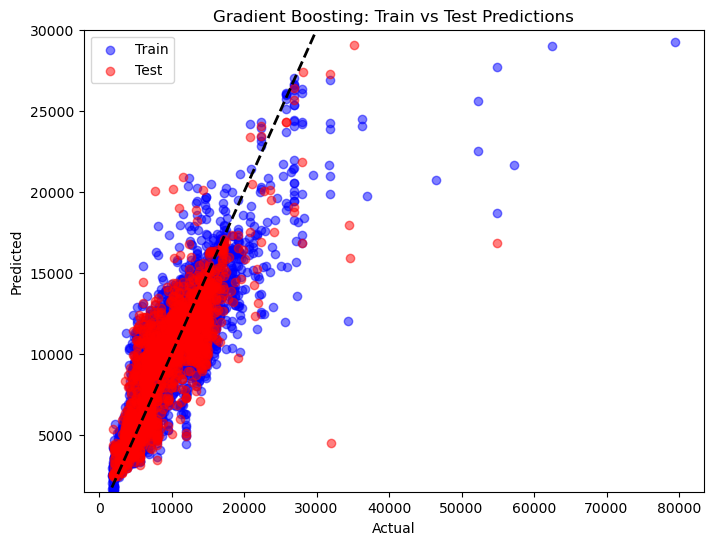

In [194]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Train vs Test Predictions')
plt.legend()
plt.ylim(1500, 30000)
plt.show()